# Variable Defination


In [1]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

# Importing Libraries and Loading data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("black friday sales report.csv")

In [4]:
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [5]:
data.shape

(550068, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Checking for Null Values


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Null Value in percentage


In [8]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
#There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

# Unique elements in each attributes


In [10]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [11]:
#We can drop User_ID and Product_ID for model prediction as it has more unique values.

# EDA


# Target Variable Purchase

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


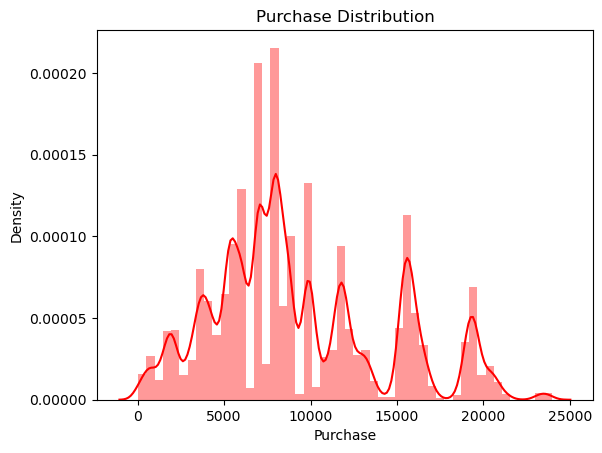

In [12]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


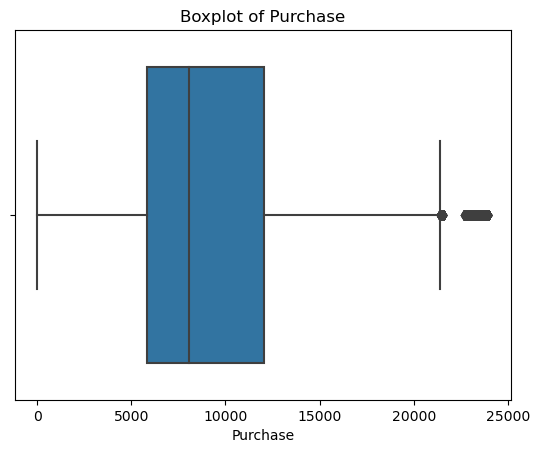

In [13]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [14]:
data["Purchase"].skew()

0.6001400037087128

In [15]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [16]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [17]:
#The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

# Gender


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


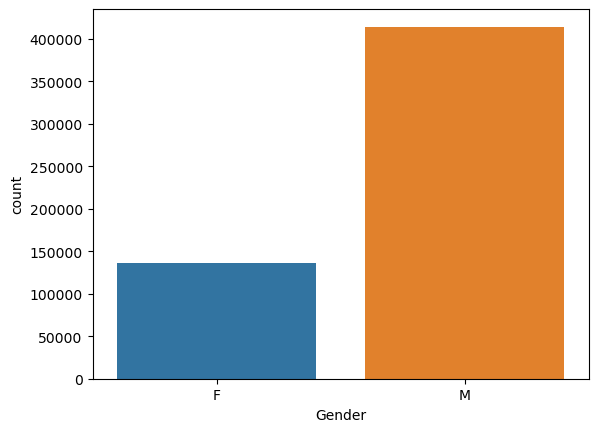

In [18]:
sns.countplot(data['Gender'])
plt.show()

In [19]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [20]:
#There are more males than females

In [21]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [22]:
#On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

# Marital Status

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


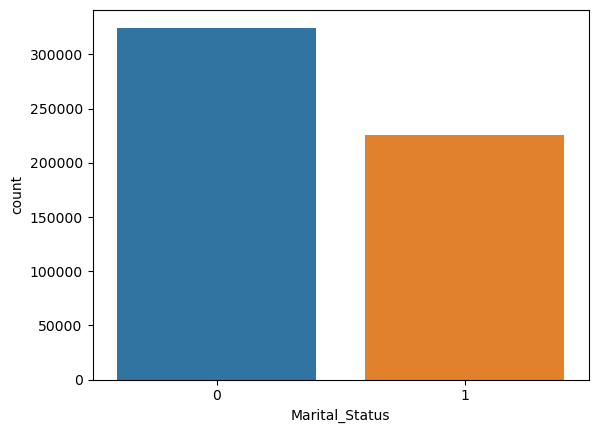

In [23]:
sns.countplot(data['Marital_Status'])
plt.show()

In [24]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

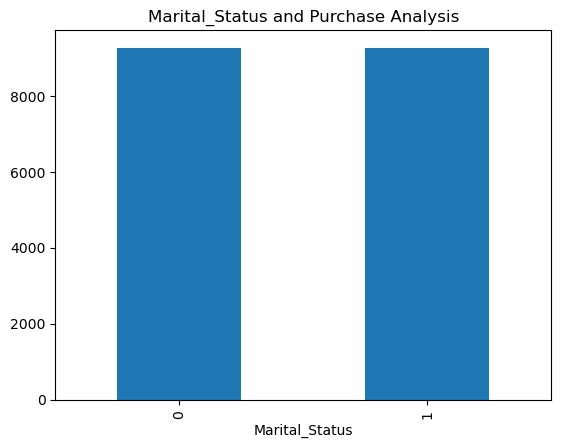

In [25]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

In [26]:
#This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

# Occupation

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


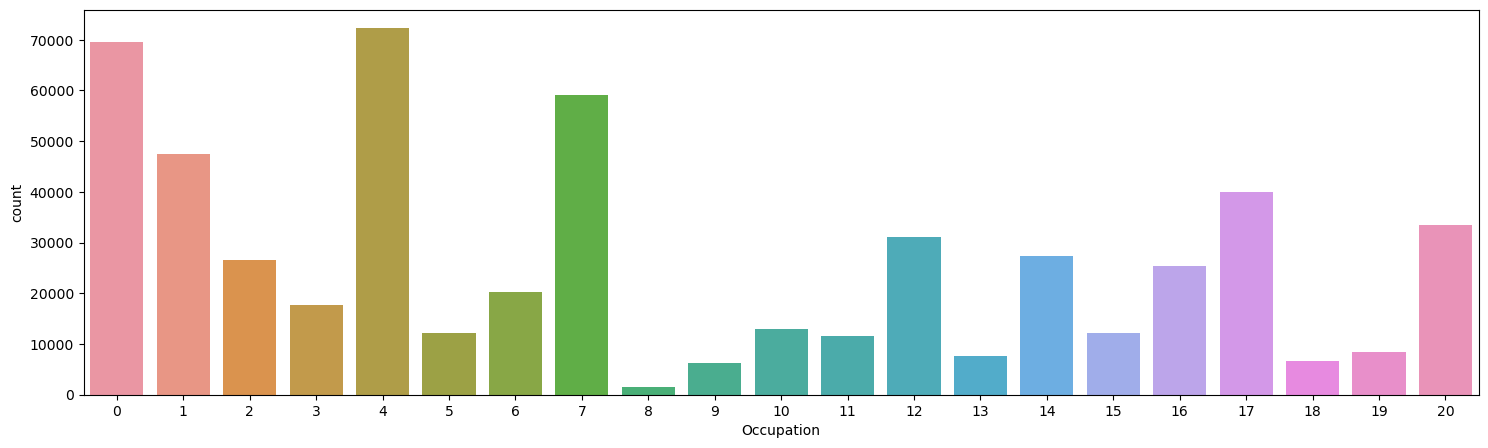

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

In [28]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

Purchase
Occupation             
0           9124.428588
1           8953.193270
2           8952.481683
3           9178.593088
4           9213.980251
5           9333.149298
6           9256.535691
7           9425.728223
8           9532.592497
9           8637.743761
10          8959.355375
11          9213.845848
12          9796.640239
13          9306.351061
14          9500.702772
15          9778.891163
16          9394.464349
17          9821.478236
18          9169.655844
19          8710.627231
20          8836.494905

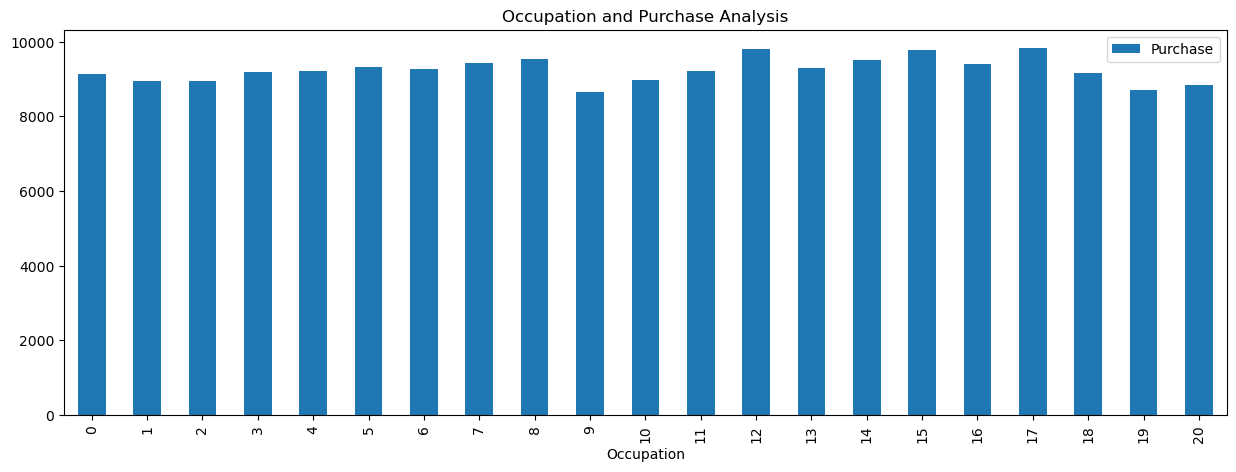

In [29]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

In [30]:
#Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# City Category


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


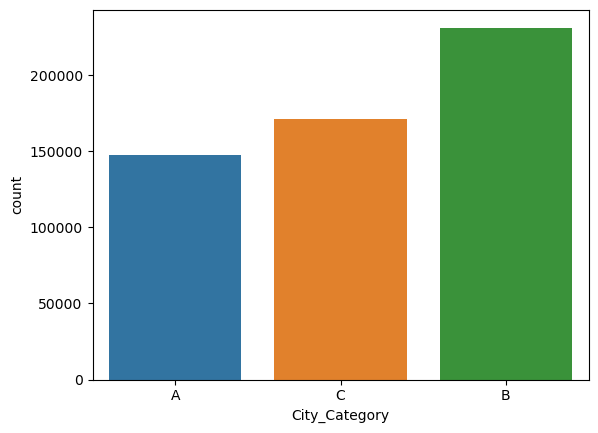

In [31]:
sns.countplot(data['City_Category'])
plt.show()

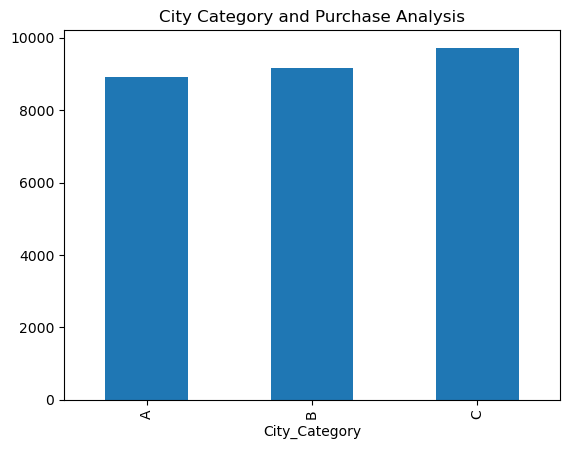

In [32]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

In [33]:
#However, the city whose buyers spend the most is city type ‘C’.

# Stay In Current City Years

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


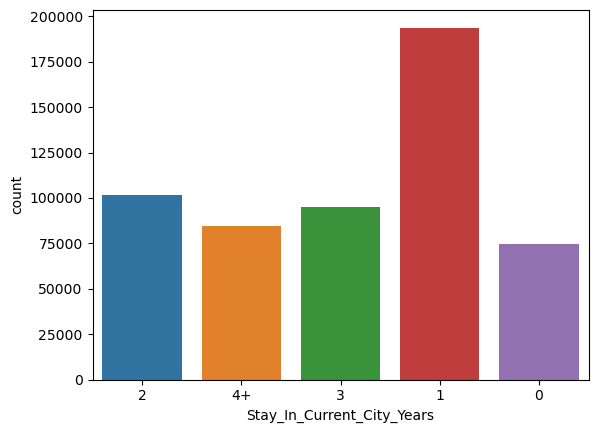

In [34]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

In [35]:
#It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

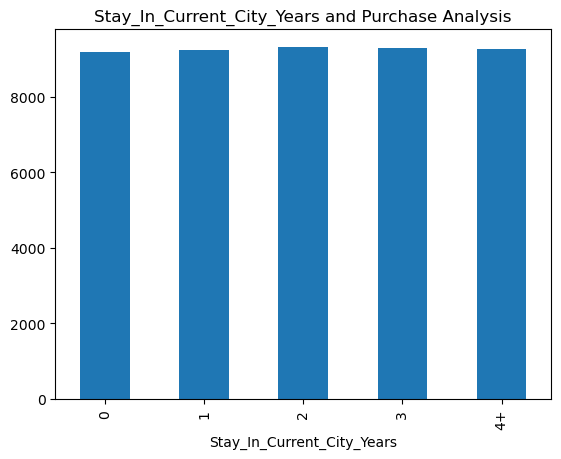

In [36]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

# Age

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


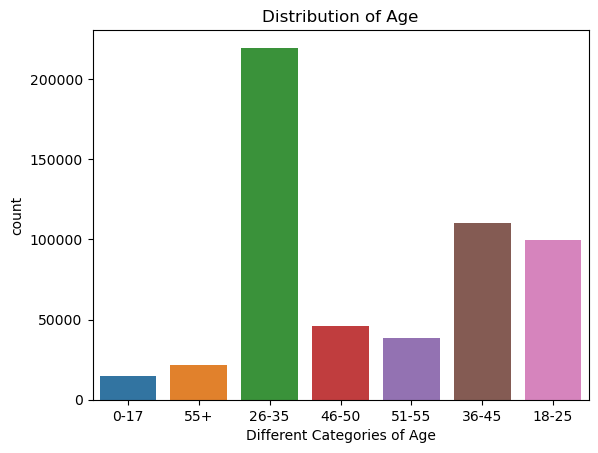

In [37]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<AxesSubplot:xlabel='Age'>

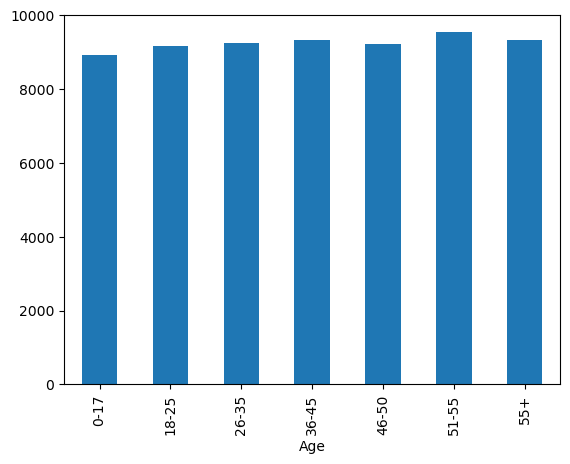

In [38]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

In [39]:
#Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

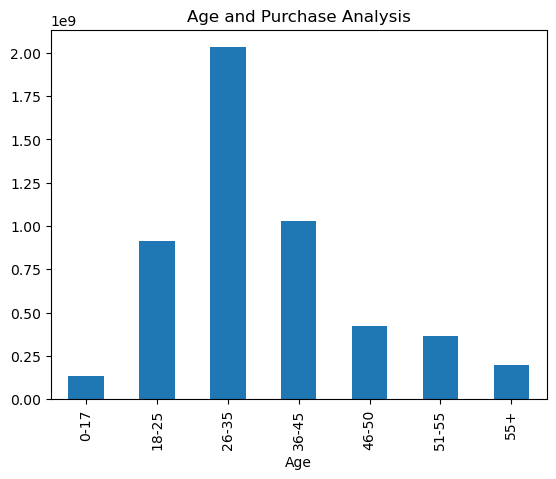

In [40]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

In [41]:
#Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

# Product Category 1


C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


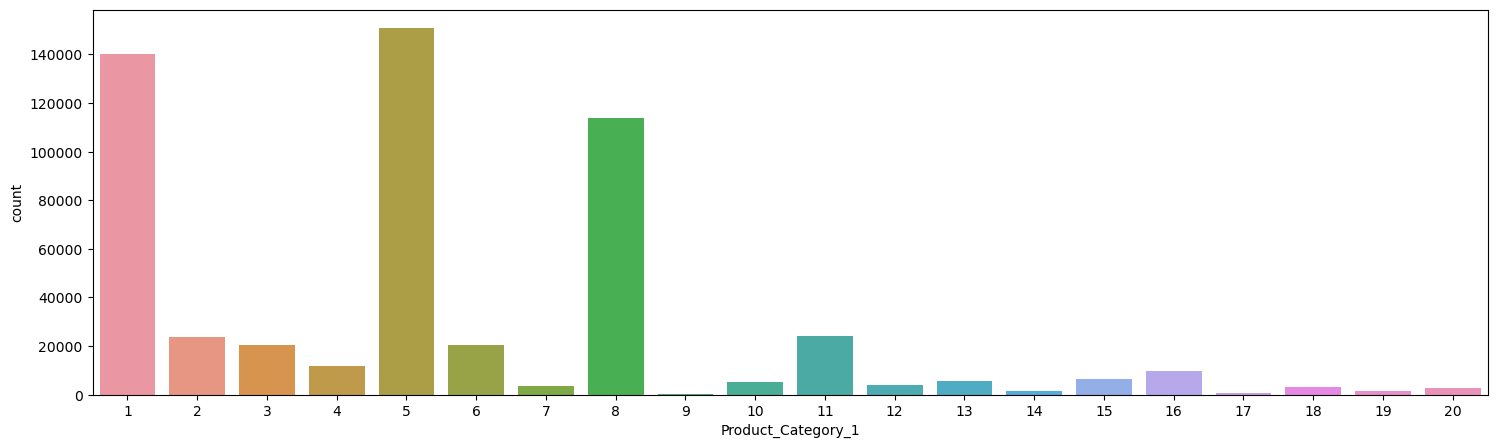

In [42]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

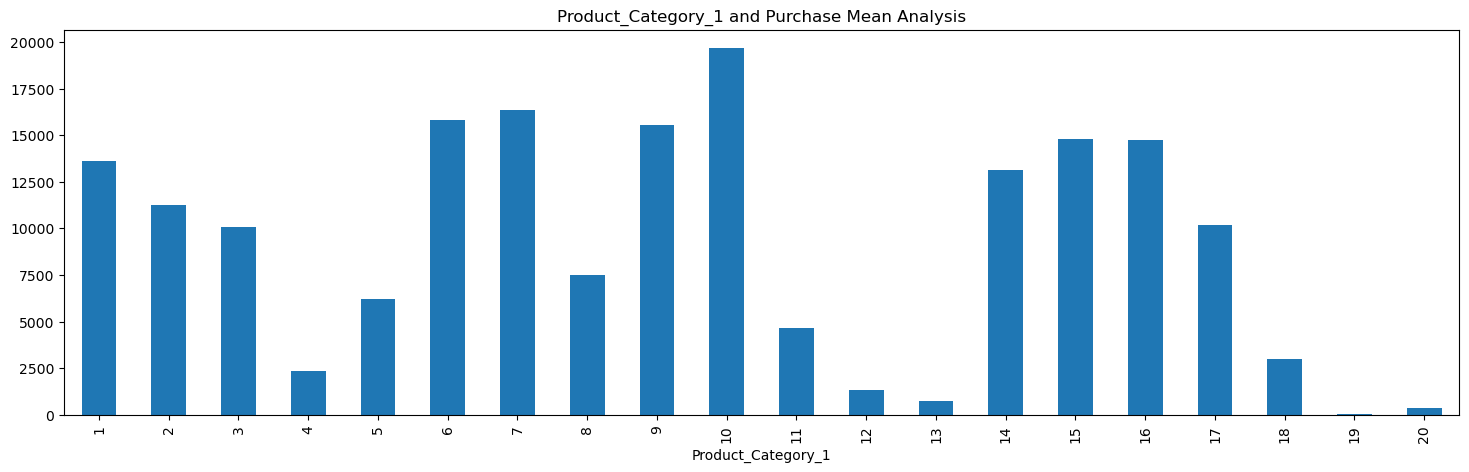

In [43]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

In [44]:
#If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

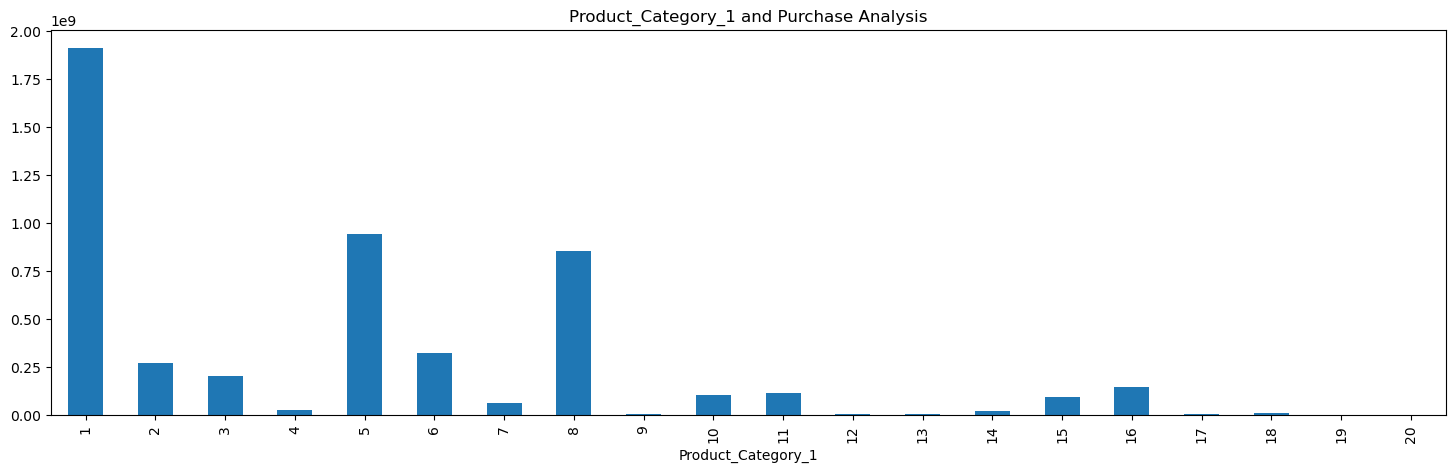

In [45]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

# Product Category 2 

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


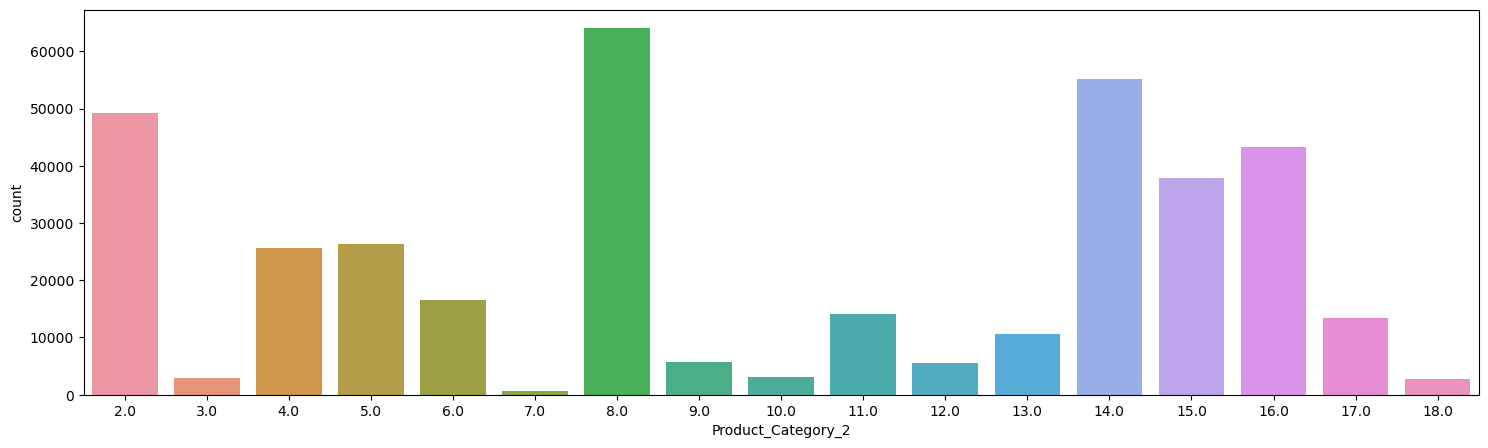

In [46]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

# Product Category 3

C:\Users\nony1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


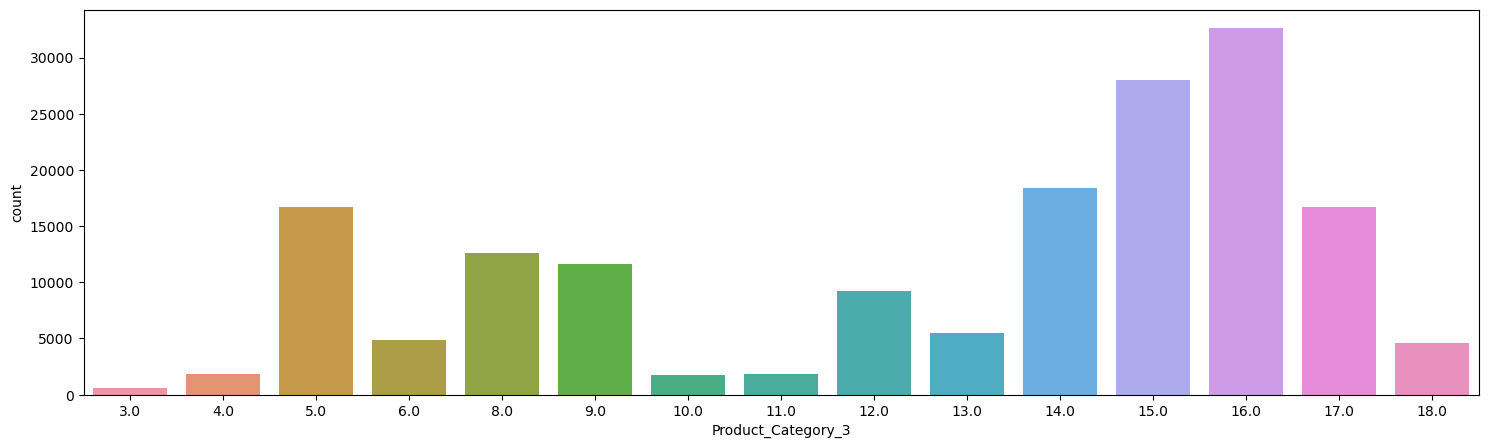

In [47]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [48]:
data.corr()

User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583            0.229678 -0.343703  
Product_Category_2            1.000000            0.543649 -0.209918  
Product_Category_3            0.543649            1.000000 -0.022006  
Purchase                     -0.209918           -0.022006  1.000000

# Heatmap

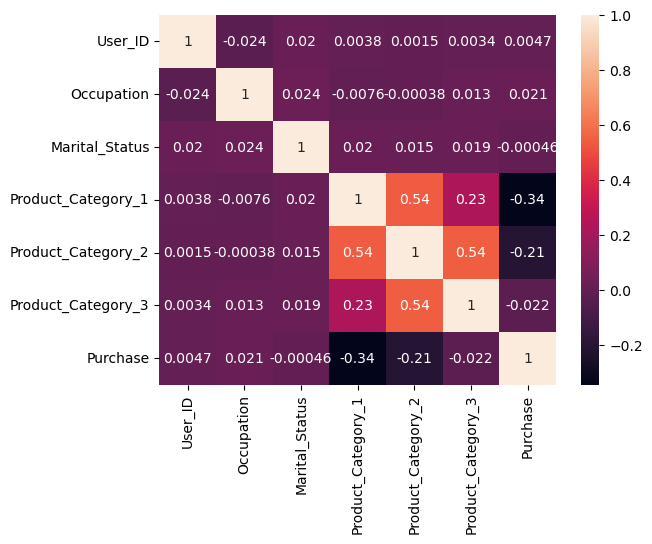

In [49]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [50]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [51]:
df = data.copy()

In [52]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [53]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

# Encoding the categorical variables

In [54]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [55]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [56]:
df['Age'] = lr.fit_transform(df['Age'])

In [57]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [58]:
df.head()

User_ID Product_ID  Gender  Age  Occupation  City_Category  Marital_Status  \
0  1000001  P00069042       0    0          10              0               0   
1  1000001  P00248942       0    0          10              0               0   
2  1000001  P00087842       0    0          10              0               0   
3  1000001  P00085442       0    0          10              0               0   
4  1000002  P00285442       1    6          16              2               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                 NaN                 NaN      8370   
1                   1                 6.0                14.0     15200   
2                  12                 NaN                 NaN      1422   
3                  12                14.0                 NaN      1057   
4                   8                 NaN                 NaN      7969   

   Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   

   Stay_In_Current_City_Years_4+  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1

In [59]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [60]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

# Dropping the irrelevant columns

In [62]:
df = df.drop(["User_ID","Product_ID"],axis=1)

# Splitting data into independent and dependent variables

In [63]:
X = df.drop("Purchase",axis=1)

In [64]:
y=df['Purchase']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modeling

# Linear Regression


In [66]:
from sklearn.linear_model import LinearRegression

lregressor=LinearRegression()
lregressor.fit(X_train,y_train)

print("Intercept",lregressor.intercept_)
print("\nSlope:",lregressor.coef_)

y_pred=lregressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Intercept 9536.4007641316

Slope: [ 465.82318446  112.36643445    5.05508596  314.06766138  -58.23217776
 -348.4514785    12.98415047  143.49190467  -20.83796687    5.4676518
   17.68367185   -3.96751734    1.65416056]
Mean Absolute Error: 3532.069226165843
Mean Squared Error: 21397853.26940751
Root Mean Squared Error: 4625.781368526566


# DecisionTree

In [67]:
from sklearn.tree import DecisionTreeRegressor
 
dregressor = DecisionTreeRegressor()
dregressor.fit(X_train , y_train)
y_pred=dregressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2370.721740105736
Mean Squared Error: 11296130.622772558
Root Mean Squared Error: 3360.9716783651356


# Random Forest


In [68]:
from sklearn.ensemble import RandomForestRegressor

rreg=RandomForestRegressor(n_estimators=66, random_state=0)
rreg.fit(X_train, y_train)
y_pred=rreg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2223.5570785099912
Mean Squared Error: 9329516.492510026
Root Mean Squared Error: 3054.4257222119554


# Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor(n_estimators=66, random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 2297.1391370111787
Mean Squared Error: 9050224.140041403
Root Mean Squared Error: 3008.359044403012


# XGBoost Regressor

In [70]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.3,learning_rate=0.2,
                          max_depth=10,aplha=15,n_estimators=100)

xg_reg.fit(X_train,y_train)

y_pred=xg_reg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[07:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "aplha" } are not used.

Mean Absolute Error: 2185.265442243812
Mean Squared Error: 8479223.939048965
Root Mean Squared Error: 2911.9107024510495


# Report Of Dataset

In [71]:
from pandas_profiling import ProfileReport

C:\Users\nony1\AppData\Local\Temp\ipykernel_17420\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [72]:
rp =ProfileReport(df)
rp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2875